In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('PJM.csv')

# a.


In [2]:
def ar_p(s, phi):
    
    forecast = phi[0] + np. dot(phi[1:], s[::-1])
    return forecast

In [3]:
# using optimal lag selected from assignment 2 
# For Zonal COMED price
# Optimal lags is 16, so we use last 16 observations to do the forecast
# as well as phi from regression result


In [4]:
res = AutoReg(df[' Zonal COMED price'], lags=16).fit()
phi = res.params
s = df[' Zonal COMED price'].tail(16)
forecast = ar_p(s,phi)
forecast

23.678771871299972

In [5]:
# For System load forecast
# Optimal lags is 3, so we use last 3 observations to do the forecast
# as well as phi from regression result
res = AutoReg(df[' System load forecast'], lags=3).fit()
phi = res.params
s = df[' System load forecast'].tail(3)
forecast = ar_p(s,phi)
forecast

85295.82107256

In [6]:
# For Zonel load forecast
# Optimal lags is 5, so we use last 5 observations to do the forecast
# as well as phi from regression result
res = AutoReg(df[' Zonal COMED load foecast'], lags=5).fit()
phi = res.params
s = df[' Zonal COMED load foecast'].tail(5)
forecast = ar_p(s,phi)
forecast

10067.358660190484

# b.

In [7]:
def get_phi_resi(s, p):
    
    mod = AutoReg(s, lags=p).fit()
    phi = mod.params
    resi = mod.resid
    
    return np.array(phi), np.array(resi)

In [8]:
# using optimal lag selected from assignment 2 
# For Zonal COMED price
s = df[' Zonal COMED price']
p = 16
phi_p, resi_p = get_phi_resi(s, p)
print("Estimated coefficients:", phi_p)
print("Residuals:", resi_p)

Estimated coefficients: [ 1.80982889  1.11241998 -0.13615611 -0.09284347  0.03548767 -0.057198
  0.00547631  0.04398162 -0.08170224  0.01899361  0.06487121  0.14443145
 -0.1586853   0.17512893 -0.20639269 -0.06041851  0.13320543]
Residuals: [ 1.18127577  3.90778336  1.89629594 ... -1.09980742 -0.4743879
  0.02216413]


In [9]:
phi_p.shape

(17,)

In [10]:
resi_p.shape

(52400,)

In [11]:
# For System load forecast
s = df[' System load forecast']
p = 3
phi_s, resi_s = get_phi_resi(s, p)
print("Estimated coefficients:", phi_s)
print("Residuals:", resi_s)

Estimated coefficients: [ 2.26734180e+03  2.23678861e+00 -1.71501461e+00  4.53312951e-01]
Residuals: [-296.1429006   306.57411405  561.29016355 ... -552.46223455 -912.12935359
 -973.98253603]


In [12]:
# For Zonel load forecast
s = df[' Zonal COMED load foecast']
p = 5
phi_z, resi_z = get_phi_resi(s, p)
print("Estimated coefficients:", phi_z)
print("Residuals:", resi_z)

Estimated coefficients: [ 3.22517794e+02  2.13545815e+00 -1.61897305e+00  6.48358009e-01
 -2.75543407e-01  8.23373577e-02]
Residuals: [  17.47792893  116.68567927  141.99216092 ...  -27.09147273  -60.50929364
 -244.41268172]


# c.

In [13]:
from numpy.random import default_rng
BitGenerator = default_rng()  

def simulate_ar(bg, s, phi, e, h):
    MySim = np.zeros(h)
    pred = np.zeros(h)
    
#AR process: forecast next period and rolling it to s
    for i in range(h):
        next_pred = phi[0] + np.dot(phi[1:], s[::-1])
        pred[i] = next_pred
        s = np.append(s[1:], next_pred)
        
#Bootstrape error
    error = [e[bg.integers(0, len(e))] for _ in range(h)]
    
    for i in range(h):
        MySim[i] = pred[i] + error[i]
        
    return MySim

In [14]:
# using optimal lag selected from assignment 2 
# using h=5 as prediction length
bg = BitGenerator

# For Zonal COMED price
# Optimal lags is 16, so we use last 16 observations to do the forecast
# as well as phi from part b
s = df[' Zonal COMED price'].tail(16)
phi = phi_p
e = resi_p
h = 5
MySim = simulate_ar(bg, s, phi, e, h)

MySim


array([21.67659698, 18.5825188 , 27.27254048, 26.61531413, 26.9896421 ])

In [15]:
# For System load forecast
# Optimal lags is 3, so we use last 3 observations to do the forecast
# as well as phi from part b
s = df[' System load forecast'].tail(3)
phi = phi_s
e = resi_s
h = 5
MySim = simulate_ar(bg, s, phi, e, h)

MySim

array([85686.89570415, 83664.33101787, 82191.57759835, 81792.85442923,
       83055.12373899])

In [16]:
# For Zonel load forecast
# Optimal lags is 5, so we use last 5 observations to do the forecast
# as well as phi from part b
s = df[' Zonal COMED load foecast'].tail(5)
phi = phi_z
e = resi_z
h = 5
MySim = simulate_ar(bg, s, phi, e, h)

MySim

array([11109.84138399,  9883.74441347,  9695.74379851,  9707.82423745,
        9703.01393435])

# d.

In [17]:
def simulate_N_ar(bg, s, p, h, N):
    MySim = np.zeros((N, h))
    pred = np.zeros(h)
    
    phi, e = get_phi_resi(s, p)
    
    for n in range(N):
    #AR process: forecast next period and rolling it to s
        for i in range(h):
            next_pred = phi[0] + np.dot(phi[1:p+1], s[-1:-p-1:-1])
            pred[i] = next_pred
            s = np.append(s[1:], next_pred)

    #Bootstrape error
        error = [e[bg.integers(0, len(e))] for _ in range(h)]

        for i in range(h):
            MySim[n, i] = pred[i] + error[i]

    return MySim

In [18]:

# same to part c we use h=5 
# we simulate this AR for N=4 times
bg = BitGenerator

# For Zonal COMED price
# Optimal lags is 16, so we use last 16 observations to do the forecast

s = df[' Zonal COMED price']
p = 16
h = 5
N = 4
res = simulate_N_ar(bg, s, p, h, N)

res


array([[22.95279088, 16.89783946, 20.65016322, 19.72769583, 24.70607052],
       [21.36018916, 26.19606695, 32.42075828, 22.92092645, 25.83562233],
       [24.03387659, -4.95734156, 22.37368519, 26.37145856, 29.67710816],
       [30.2745214 , 20.14153672, 29.00638851, 29.64161336, 29.6411846 ]])

In [19]:
# For System load forecast
# Optimal lags is 3, so we use last 3 observations to do the forecast

s = df[' System load forecast']
p = 3
h = 5
N = 4
res = simulate_N_ar(bg, s, p, h, N)

res


array([[84356.65033725, 82004.11924477, 82442.21531973, 81418.87652246,
        82960.25629129],
       [83461.47928394, 83953.45974766, 84764.57492257, 86899.73619981,
        87918.36116852],
       [86031.92592898, 89653.00695218, 89874.33261171, 90472.30599856,
        91059.03178889],
       [89681.02868015, 91368.57570532, 88859.55434855, 89928.79383126,
        93209.1917828 ]])

In [20]:
# For Zonel load forecast
# Optimal lags is 5, so we use last 5 observations to do the forecast

s = df[' Zonal COMED load foecast']
p = 5
h = 5
N = 4
res = simulate_N_ar(bg, s, p, h, N)

res


array([[10368.5429811 , 10043.10218463,  9688.1349473 ,  9811.8297492 ,
         9825.34696123],
       [ 9870.82805662, 10077.66579562,  9881.03772055, 10648.20915975,
        10880.83290863],
       [10639.27341823, 10981.83532321, 10960.35234019, 10693.81648963,
        11144.72280216],
       [11093.51803139, 11442.81953444, 11473.55484739, 11722.99806056,
        11687.15772134]])

# e.

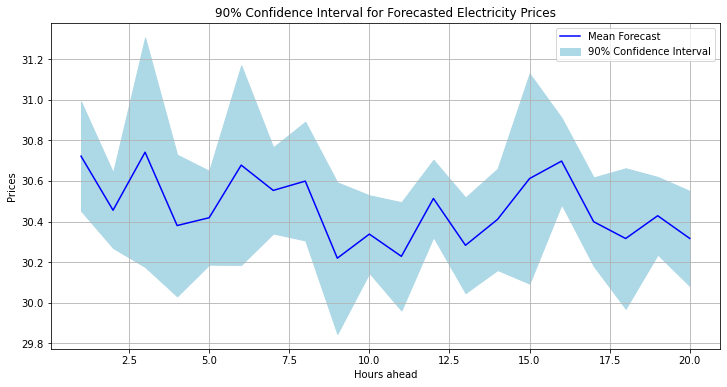

In [21]:
from scipy.stats import norm

s = df[' Zonal COMED price']
p = 24
h = 20
N = 1000
alpha = 0.1

prices = simulate_N_ar(bg, s, p, h, N)
mean = np.mean(prices, axis=0)
std = np.std(prices, axis=0)

# CI
z = norm.ppf(1 - alpha / 2)
low = mean - (z * std / np.sqrt(N))
up = mean + (z * std / np.sqrt(N))

plt.figure(figsize=(12, 6))
plt.plot(range(1, h + 1), mean, label='Mean Forecast', color='b')
plt.fill_between(range(1, h + 1), low, up, color='lightblue', label='90% Confidence Interval')
plt.xlabel('Hours ahead')
plt.ylabel('Prices')
plt.title('90% Confidence Interval for Forecasted Electricity Prices')
plt.legend()
plt.grid(True)
plt.show()